In [177]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [178]:
device

device(type='cpu')

In [179]:
Tr_D = dsets.MNIST(root='data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

Te_D = dsets.MNIST(root='data', 
                           train=False, 
                           transform=transforms.ToTensor(), download=True)
print(Tr_D)
print(Tr_D.data.size())
print(Tr_D.targets.size())
print(Te_D)
print(Te_D.data.size())


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([10000, 28, 28])


Label: 7


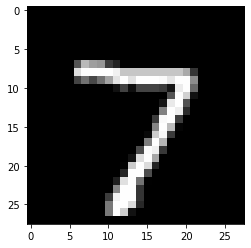

Label: 5


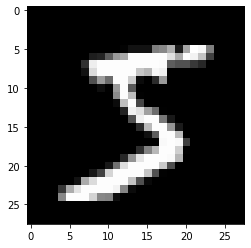

In [180]:
plt.imshow(Te_D[0][0][0],cmap='gray')
print('Label:', Te_D[0][1])
plt.show()
plt.imshow(Tr_D[0][0][0],cmap='gray')
print('Label:', Tr_D[0][1])

In [171]:
sequence_len = 28
input_s = 28
hidden_s = 128
num_lay = 2
num_classes = 10
batch_s = 100
num_epo = 2
learning_rate = 0.01

In [172]:
from torch.utils.data import DataLoader
train_set = DataLoader(dataset = Te_D, batch_size = 100, shuffle = True)
test_set = DataLoader(dataset = Tr_D, batch_size = 100, shuffle= True)

In [181]:
class RNN(nn.Module):

  def __init__(self, input_s, hidden_s, num_lay, num_classes) :
    super(RNN, self).__init__()
    self.hidden_s =hidden_s
    self.num_lay = num_lay
    self.num_classes = num_classes 
    self.lstm = nn.LSTM (input_s, hidden_s, num_lay, batch_first = True)
    self.fc = nn.Linear (hidden_s, num_classes)

  def forward(self, x):
    out,_ = self.lstm(x)
    out = out[:,-1,:]
    out=self.fc(out)
    return out


model = RNN(input_s, hidden_s, num_lay, num_classes)
model = model.to(device)
print(model)

RNN(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)


In [182]:
from torch import optim
Optim = optim.Adam(model.parameters(), lr= 0.01) 
loss_fn = nn.CrossEntropyLoss()
list1 = []
list2 = []
for epoch in range(11):
  with torch.no_grad():
    for dig, lab in test_set:
      dig = dig.reshape(-1, 28, 28).to(device)
      result = model(dig)
      lab = lab.to(device)
      loss = loss_fn(result, lab)
      print("Epoch - " + str(epoch) +", Loss_test - " + str(loss.item()), end = ' ' )
      _, pred = torch.max(result.data, dim=1)
      n = (pred==lab).sum().item()
      list1.append((1.0*n)/batch_s)
      break
  for i, (dig, lab) in enumerate(train_set):
    dig = dig.reshape(-1, 28, 28).to(device)
    result = model(dig)
    lab = lab.to(device)
    loss = loss_fn(result, lab)
    Optim.zero_grad()
    loss.backward()
    Optim.step()
    if i == 0:
      result = model(dig)
      loss = loss_fn(result, lab)
      print(", Loss_train - " + str(loss.item()))
      _, pred = torch.max(result.data, dim=1)
      n = (pred==lab).sum().item()
      list2.append((1.0*n)/batch_s)

Epoch - 0, Loss_test - 2.2971954345703125 , Loss_train - 2.2614798545837402
Epoch - 1, Loss_test - 0.5193547606468201 , Loss_train - 0.47552230954170227
Epoch - 2, Loss_test - 0.26251912117004395 , Loss_train - 0.23688311874866486
Epoch - 3, Loss_test - 0.16140630841255188 , Loss_train - 0.12306062877178192
Epoch - 4, Loss_test - 0.16225659847259521 , Loss_train - 0.13457895815372467
Epoch - 5, Loss_test - 0.2323012799024582 , Loss_train - 0.047955222427845
Epoch - 6, Loss_test - 0.16240166127681732 , Loss_train - 0.02486955188214779
Epoch - 7, Loss_test - 0.13966543972492218 , Loss_train - 0.0465177446603775
Epoch - 8, Loss_test - 0.19878698885440826 , Loss_train - 0.04015025496482849
Epoch - 9, Loss_test - 0.3901561498641968 , Loss_train - 0.018482260406017303
Epoch - 10, Loss_test - 0.11851607263088226 , Loss_train - 0.04898544400930405


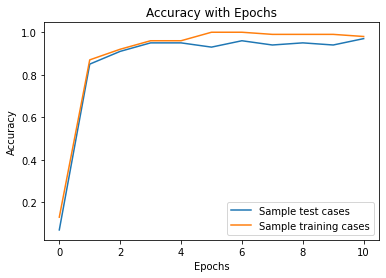

In [183]:
plt.plot(list1, label = 'Sample test cases')
plt.plot(list2, label = 'Sample training cases')
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Accuracy with Epochs")
plt.show()

In [184]:
with torch.no_grad():
  correct = 0
  total = 0
  for img, lab in test_set:
    img=img.reshape(-1,28,28).to(device)
    lab=lab.to(device)
    outp = model(img)
    _, prediction = torch.max(outp.data, dim=1)
    correct += (prediction==lab).sum().item()
    total += lab.size(0)
  print('Test Accuracy of the model on the 10000 test images: {} %'.format((100 * correct)/total))

Test Accuracy of the model on the 10000 test images: 96.995 %
